In [112]:
import pandas as pd

In [113]:
df = pd.read_csv("out.csv")

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
stats = list(df.columns)[2:]

In [116]:
sns.set(rc={'figure.facecolor':'white'})
plt.rcParams['savefig.dpi'] = 300

In [117]:
df = df[~((df["model"]=="SGD1")|(df["model"]=="SGD2")|(df["model"]=="SGD3"))]

In [118]:
# df = df[(df["elapsed"])]

In [119]:
# df = df[(df["mse"]<12552.223633)]

In [120]:
# df[(df["model"]=="linstorch")&(df["mse"]>0)].max()

In [121]:
df[(df["model"]=="linstorch")]["elapsed"].mean()

0.03991157054901119

In [122]:
df[(df["model"]=="Adagrad3")]["elapsed"].mean()

0.02911134004592891

In [123]:
df[(df["model"]=="Adagrad5")]["elapsed"].mean()

0.04633019447326656

In [124]:
df[(df["model"]=="Adagrad5")]["mse"].mean()

0.5520906102657318

In [125]:
df[(df["model"]=="linstorch")]["mse"].mean()

0.4927116858959198

In [126]:
list(df["model"].unique())

['linstorch',
 'Adagrad1',
 'Adagrad2',
 'Adagrad3',
 'Adagrad4',
 'Adagrad5',
 'Adam1',
 'Adam2',
 'Adam3']

In [130]:
# sns.scatterplot(x=df[(df["model"]=="Adagrad3")]["elapsed"], y=df[(df["model"]=="Adagrad3")]["mse"])
# sns.scatterplot(x=df[(df["model"]=="linstorch")]["elapsed"], y=df[(df["model"]=="linstorch")]["mse"])
# plt.show()

C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


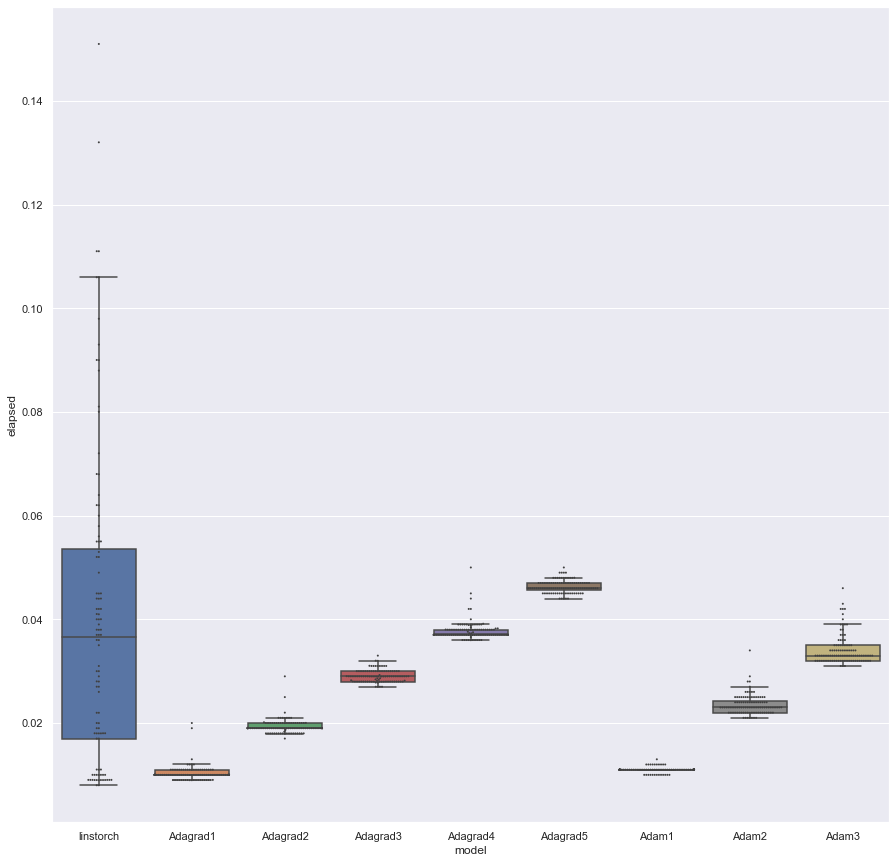

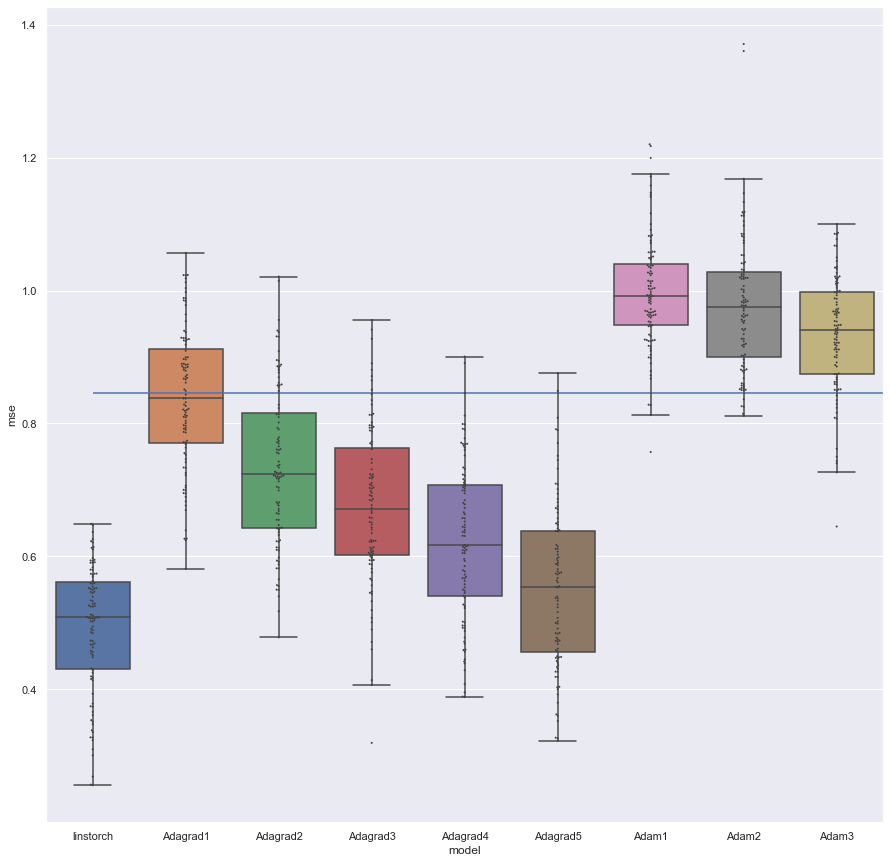

In [128]:
for stat in stats:
    plt.subplots(figsize=(15,15))
    # ax = sns.violinplot(x="model", y=stat, data=df)
    # fig = ax.get_figure()
    # fig.savefig("out/" + stat + '_swarm.png')
    ax = sns.boxplot(x="model", y=stat, data=df, showfliers=False)
    ax = sns.swarmplot(x="model", y=stat, data=df, color=".25", s = 2)
    if stat=="mse": plt.hlines(0.8453290438010049, 0, 100)
    plt.savefig("outm/" + stat + '_swarm.png')